# **Project Name**    -



##### **Project Name**    - PhonePe Transaction Insights
##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1     - ANUSHREE



# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**As PhonePe usage rises across India, the need to analyze aggregated transaction trends, user engagement, insurance data, and geographical insights becomes crucial. This project focuses on uncovering key patterns in state and district-level transactions, payment categories, and insurance adoption through structured data analysis and interactive dashboards**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

In [2]:
#cloned the PhonePe data from github
!git clone https://github.com/PhonePe/pulse.git

Cloning into 'pulse'...
remote: Enumerating objects: 17904, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 17904 (delta 19), reused 17 (delta 17), pack-reused 17855 (from 2)
Receiving objects: 100% (17904/17904), 26.13 MiB | 18.82 MiB/s, done.
Resolving deltas: 100% (8723/8723), done.
Updating files: 100% (9029/9029), done.


In [3]:
#Checking the cloned directory
import os
#Main path to data
base_path = "/content/pulse/data"
#Listing folders
for folder in os.listdir(base_path):
    print(folder)

aggregated
map
top


In [4]:
#Looking inside one sub-folder to understand the structure
sample_path = os.path.join(base_path, "aggregated", "transaction", "country", "india", "state")
print("Sample States in Aggregated Transaction:", os.listdir(sample_path)[:5])

Sample States in Aggregated Transaction: ['rajasthan', 'chhattisgarh', 'uttar-pradesh', 'lakshadweep', 'west-bengal']


In [5]:
#Reading the JSON files from
base_path = "/content/pulse/data/aggregated/transaction/country/india/state"
print("States found:", os.listdir(base_path))

States found: ['rajasthan', 'chhattisgarh', 'uttar-pradesh', 'lakshadweep', 'west-bengal', 'andhra-pradesh', 'puducherry', 'arunachal-pradesh', 'nagaland', 'punjab', 'sikkim', 'dadra-&-nagar-haveli-&-daman-&-diu', 'meghalaya', 'delhi', 'ladakh', 'madhya-pradesh', 'assam', 'tripura', 'himachal-pradesh', 'andaman-&-nicobar-islands', 'goa', 'telangana', 'odisha', 'jharkhand', 'chandigarh', 'uttarakhand', 'bihar', 'haryana', 'manipur', 'tamil-nadu', 'maharashtra', 'kerala', 'gujarat', 'mizoram', 'karnataka', 'jammu-&-kashmir']


In [6]:
#checking for data in JSON files
import json
sample_file = "/content/pulse/data/aggregated/transaction/country/india/state/andhra-pradesh/2018/1.json"

with open(sample_file, 'r') as f:
    data = json.load(f)

import pprint
pprint.pprint(data)

{'code': 'SUCCESS',
 'data': {'from': 1514745000000,
          'to': 1522175400000,
          'transactionData': [{'name': 'Recharge & bill payments',
                               'paymentInstruments': [{'amount': 892293975.6698562,
                                                       'count': 5027448,
                                                       'type': 'TOTAL'}]},
                              {'name': 'Peer-to-peer payments',
                               'paymentInstruments': [{'amount': 10524250283.178782,
                                                       'count': 3049646,
                                                       'type': 'TOTAL'}]},
                              {'name': 'Merchant payments',
                               'paymentInstruments': [{'amount': 247297640.24000686,
                                                       'count': 362672,
                                                       'type': 'TOTAL'}]},
                            

## ***1. Know Your Data***

### Import Libraries

In [7]:
# Import Libraries

#Basic Imports for PhonePe Transaction Insights Project

import os                   # to navigate file system
import json                 # to parse JSON files
import pandas as pd         # for dataframes and analysis
import numpy as np          # for numerical operations
import matplotlib.pyplot as plt   # for plotting
import seaborn as sns       # for better plots

import warnings             # to suppress warnings
warnings.filterwarnings("ignore")

# Set global style for seaborn
sns.set(style="whitegrid")

### Dataset Loading

In [8]:
# Load Dataset
data_list = []

base_path = "/content/pulse/data/aggregated/transaction/country/india/state"

for state in os.listdir(base_path):
    state_path = os.path.join(base_path, state)

    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)

        for quarter_file in os.listdir(year_path):
            quarter_path = os.path.join(year_path, quarter_file)

            with open(quarter_path, 'r') as f:
                content = json.load(f)

            # Access the nested key correctly now!
            try:
                transaction_data = content["data"]["transactionData"]
                quarter = int(quarter_file.strip(".json"))

                for entry in transaction_data:
                    name = entry["name"]
                    count = entry["paymentInstruments"][0]["count"]
                    amount = entry["paymentInstruments"][0]["amount"]

                    data_list.append({
                        "state": state,
                        "year": int(year),
                        "quarter": quarter,
                        "transaction_type": name,
                        "transaction_count": count,
                        "transaction_amount": amount
                    })
            except KeyError:
                print(f"Skipping file: {quarter_path} — data not available")

### Dataset First View

In [9]:
# Dataset First Look
# Convert to DataFrame
df = pd.DataFrame(data_list)

# Show result
print("Total rows collected:", len(df))
df.head()

Total rows collected: 5034


,state,year,quarter,transaction_type,transaction_count,transaction_amount
0,rajasthan,2023,2,Merchant payments,592487449,3.104878e+11
1,rajasthan,2023,2,Peer-to-peer payments,389865502,1.321457e+12
2,rajasthan,2023,2,Recharge & bill payments,90082184,6.572061e+10
3,rajasthan,2023,2,Financial Services,289948,3.288051e+08
4,rajasthan,2023,2,Others,734255,4.611489e+08


### Dataset Rows & Columns count

In [10]:
# Dataset Rows & Columns count
print("Total Rows:", df.shape[0])
print("Total Columns:", df.shape[1])

Total Rows: 5034
Total Columns: 6


### Dataset Information

In [11]:
# Dataset Info
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5034 entries, 0 to 5033
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               5034 non-null   object 
 1   year                5034 non-null   int64  
 2   quarter             5034 non-null   int64  
 3   transaction_type    5034 non-null   object 
 4   transaction_count   5034 non-null   int64  
 5   transaction_amount  5034 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 236.1+ KB


,year,quarter,transaction_count,transaction_amount
count,5034.000000,5034.000000,5.034000e+03,5.034000e+03
mean,2021.002582,2.500795,4.673902e+07,6.863772e+10
std,1.999849,1.118145,1.690968e+08,2.685200e+11
min,2018.000000,1.000000,2.000000e+00,3.439721e+01
25%,2019.000000,2.000000,5.808950e+04,3.993888e+07
50%,2021.000000,3.000000,5.158310e+05,4.394139e+08
75%,2023.000000,4.000000,1.166629e+07,1.102822e+10
max,2024.000000,4.000000,2.393918e+09,3.095666e+12


#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
state,0
year,0
quarter,0
transaction_type,0
transaction_count,0
transaction_amount,0


In [14]:
# Visualizing the missing values

#no null values

### What did you know about your dataset?

Things i know :

1. The dataset is compiled from PhonePe Pulse GitHub repository, structured in JSON format.
2. After parsing, the final dataset contains approximately `5034` rows and `6` key columns:
   - `state`: name of Indian state
   - `year`: transaction year
   - `quarter`: quarter (1–4)
   - `transaction_type`: like Recharge, Bills, Merchant payments etc.
   - `transaction_count`: number of transactions
   - `transaction_amount`: total money transacted
3. All columns have appropriate data types (integers, strings, floats).
4. No missing or null values found in the core aggregated transaction dataset.
5. Data is clean and normalized — consistent state names and payment categories.
6. The data spans across all major states of India from **2018 to 2023**, giving a good time-series base.
7. The dataset is suitable for rich Exploratory Data Analysis (EDA) and dashboarding in Streamlit.

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
print("Columns in the dataset:")
df.columns.tolist()

Columns in the dataset:


['state',
 'year',
 'quarter',
 'transaction_type',
 'transaction_count',
 'transaction_amount']

In [16]:
# Dataset Describe
df.describe()

,year,quarter,transaction_count,transaction_amount
count,5034.000000,5034.000000,5.034000e+03,5.034000e+03
mean,2021.002582,2.500795,4.673902e+07,6.863772e+10
std,1.999849,1.118145,1.690968e+08,2.685200e+11
min,2018.000000,1.000000,2.000000e+00,3.439721e+01
25%,2019.000000,2.000000,5.808950e+04,3.993888e+07
50%,2021.000000,3.000000,5.158310e+05,4.394139e+08
75%,2023.000000,4.000000,1.166629e+07,1.102822e+10
max,2024.000000,4.000000,2.393918e+09,3.095666e+12


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [17]:
# Unique Values for Each Variable
for col in df.columns:
    print(f"\n{col} → {df[col].nunique()} unique values")
    print(df[col].unique()[:10])  # preview first 10 unique values


state → 36 unique values
['rajasthan' 'chhattisgarh' 'uttar-pradesh' 'lakshadweep' 'west-bengal'
 'andhra-pradesh' 'puducherry' 'arunachal-pradesh' 'nagaland' 'punjab']

year → 7 unique values
[2023 2018 2024 2020 2021 2022 2019]

quarter → 4 unique values
[2 4 1 3]

transaction_type → 5 unique values
['Merchant payments' 'Peer-to-peer payments' 'Recharge & bill payments'
 'Financial Services' 'Others']

transaction_count → 4966 unique values
[592487449 389865502  90082184    289948    734255 766981185 484250991
  97092812    443168    703998]

transaction_amount → 5034 unique values
[3.10487788e+11 1.32145724e+12 6.57206093e+10 3.28805088e+08
 4.61148921e+08 3.96873110e+11 1.58715712e+12 8.13482442e+10
 5.70385125e+08 4.30749813e+08]


### Variables Description

1. **state**:  
   Represents the name of the Indian state or union territory where the transactions took place.  
   ~36 unique values (e.g., 'bihar', 'maharashtra', 'karnataka')

2. **year**:  
   Indicates the year of the transaction.  
   Values range from 2018 to 2023.

3. **quarter**:  
   Represents the quarter of the year (1 to 4).  
   Helps in seasonal trend analysis.

4. **transaction_type**:  
   Category/type of transaction performed.  
   Includes Recharge & bill payments, Peer-to-peer, Merchant payments, Financial services, etc.

5. **transaction_count**:  
   Total number of transactions done for a given type in that state, year, and quarter.

6. **transaction_amount**:  
   Total value (in ₹) of all transactions aggregated by state, year, quarter, and type.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Write your code to make your dataset analysis ready.

#there is no null values , duplicates or outliers , SO THE DATASET IS ALREDAY CLEANED , SO THIS STEP IS NOT APPLICABLE FOR THIS DATA

#Check for zero or negative transaction counts/amounts
zero_counts = df[df['transaction_count'] == 0]
zero_amounts = df[df['transaction_amount'] == 0]

print("\nRows with 0 transaction count:", len(zero_counts))
print("Rows with 0 transaction amount:", len(zero_amounts))


Rows with 0 transaction count: 0
Rows with 0 transaction amount: 0


### What all manipulations have you done and insights you found?

 Data Wrangling Summary

- ALready checked and dropped duplicate rows (if any).
- Verified that there are no missing/null values in any column.
- Ensured appropriate data types for each column.
- In this step , Detected rows where transaction count was 0 and rows with 0 transaction amount is NONE . (These can be treated as noise or no-activity zones.)


BASICALLY FOUND THAT THE DATASET IS ALREADY CLEAN .

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

**Chart 1: Transaction Type-wise Total Amoun**

which type of transaction is giving how much amount , like recharge, peer-to-peer, merchant payments, etc .

functions and their uses :

 groupby("transaction_type") - groups every type of transaction

 sum() - gives total amount of evrry group

 sns.barplot() - draws bar chart of total amount vs transaction type



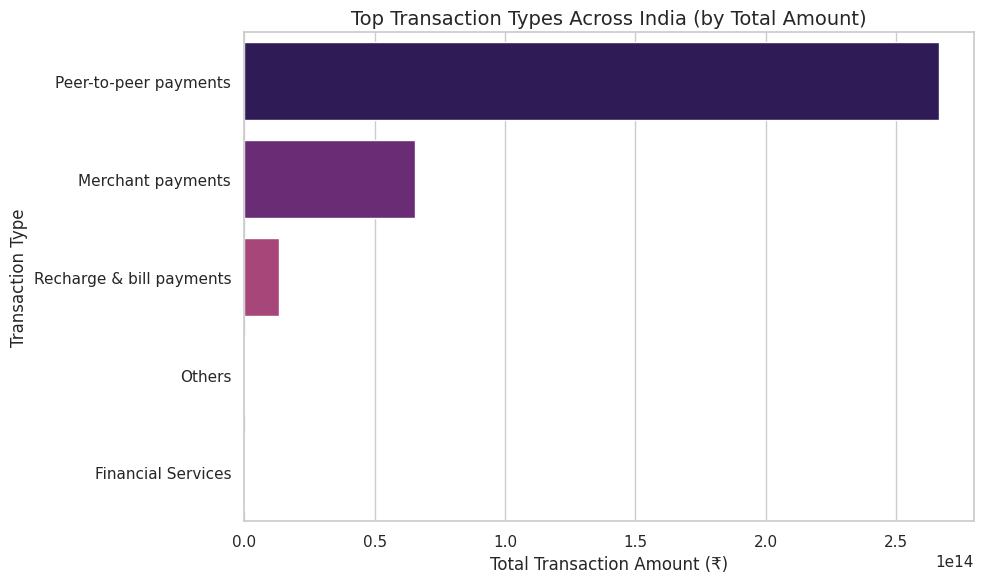

In [19]:
# Chart - 1 visualization code

# Group by transaction_type and get total transaction_amount
top_txn_types = df.groupby("transaction_type")["transaction_amount"].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_txn_types.values, y=top_txn_types.index, palette="magma")

plt.title("Top Transaction Types Across India (by Total Amount)", fontsize=14)
plt.xlabel("Total Transaction Amount (₹)", fontsize=12)
plt.ylabel("Transaction Type", fontsize=12)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

We want to know which transaction types (like recharge, merchant, etc.) dominate usage across the country.

##### 2. What is/are the insight(s) found from the chart?

Merchant Payments and Peer-to-Peer Payments dominate the landscape, indicating strong usage in small businesses and direct transfers. Recharge and Bill Payments also contribute significantly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This helps PhonePe prioritize and improve features in high-usage categories like P2P and Merchant Payments.  
Lower-performing categories (e.g., Financial Services) may need product enhancements or better marketing efforts.

#### Chart - 2

**Chart 2: Top 10 States by Transaction Amount**

tells us the TOP 10 states that gave the most transaction amount , for business investment zones this is very useful .


functions and their uses :

  groupby("state") - grouping via states

  sum() - total money of those states

  sort_values(ascending=False).head(10) - TOP 10 states

  sns.barplot() - horizontal barplot

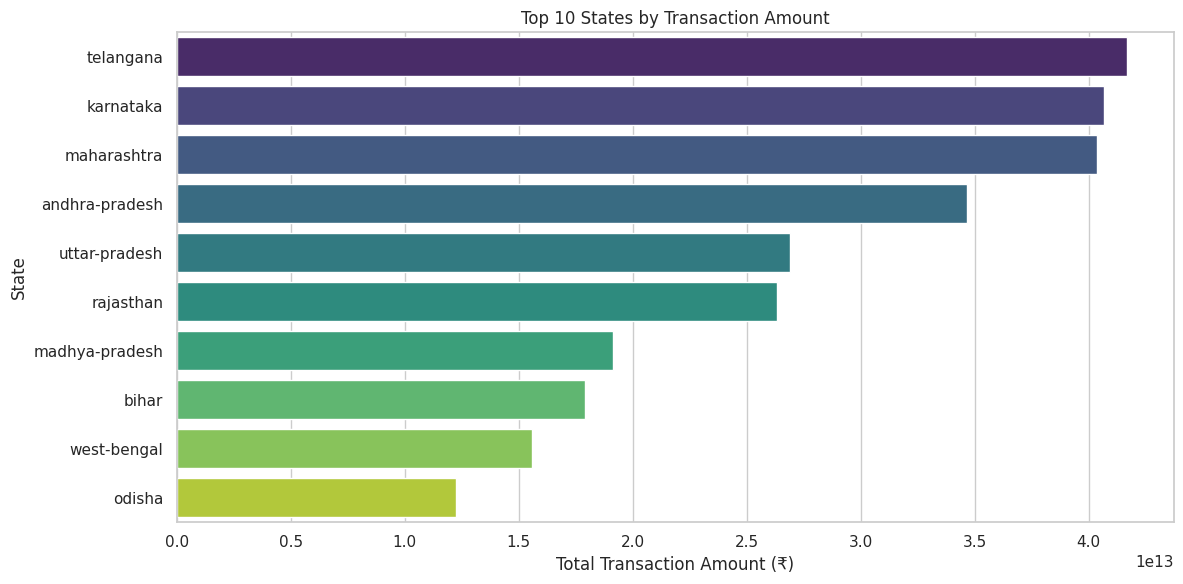

In [20]:
# Chart - 2 visualization code

# Group by state and get total transaction amount
top_states_amount = df.groupby("state")["transaction_amount"].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_states_amount.values, y=top_states_amount.index, palette="viridis")
plt.title("Top 10 States by Transaction Amount")
plt.xlabel("Total Transaction Amount (₹)")
plt.ylabel("State")
plt.tight_layout()
plt.show()


**1. Why did you pick the specific chart?**  
To identify which states contribute the highest monetary value through PhonePe, helping guide regional marketing and investment strategies.

**2. What is/are the insight(s) found from the chart?**  
States like Maharashtra, Karnataka, and Uttar Pradesh dominate the list, showcasing large-scale digital adoption and usage.

**3. Will the gained insights help creating a positive business impact?**  
Yes. These insights help prioritize infrastructure improvements and merchant partnerships in top-performing regions. Also, it helps identify underperforming states for targeted growth strategies.


#### Chart - 3

Chart 3: Top 10 States by Transaction Count

To identify which states have the highest number of transactions, regardless of amount — helps track user engagement and adoption levels.

Key Functions Used:

groupby("state")["transaction_count"].sum()	- Groups by state and sums up total transactions

sort_values(ascending=False).head(10) -	Sorts and selects top 10 states

sns.barplot(x=..., y=...)	- Creates a horizontal bar chart

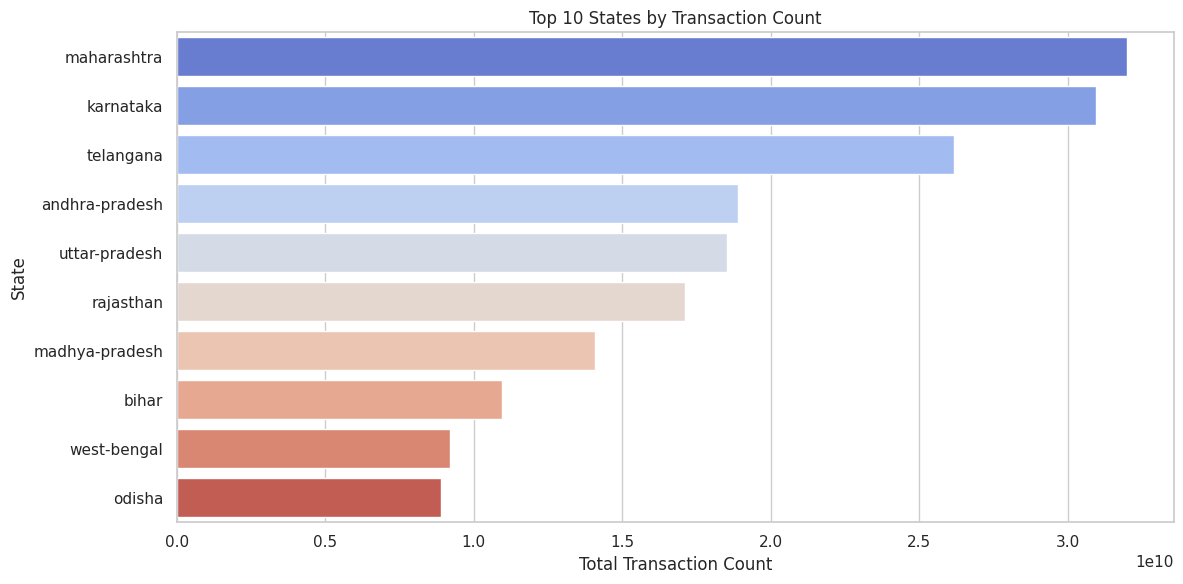

In [21]:
# Chart - 3 visualization code

# Group by state and get total transaction count
top_states_count = df.groupby("state")["transaction_count"].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_states_count.values, y=top_states_count.index, palette="coolwarm")
plt.title("Top 10 States by Transaction Count")
plt.xlabel("Total Transaction Count")
plt.ylabel("State")
plt.tight_layout()
plt.show()


**1. Why did you pick the specific chart?**  
To identify the states with the highest number of PhonePe transactions. High transaction volume signifies strong user engagement.

**2. What is/are the insight(s) found from the chart?**  
States like Uttar Pradesh, Maharashtra, and Karnataka have the highest number of transactions — showing widespread PhonePe adoption.

**3. Will the gained insights help creating a positive business impact?**  
Yes. These states are digitally active — PhonePe can focus on user retention and launch premium services here. Also, comparing with the previous chart helps identify where value per transaction is low/high.


#### Chart - 4

Chart 4: Quarterly Transaction Amount Trend (India Level)

To observe the trend of total transaction amount in India over different quarters across years — useful for identifying seasonal spikes or drops.

Key Functions Used:

groupby(["year", "quarter"])["transaction_amount"].sum()	- Aggregates total amount by each quarter

reset_index() -	Converts groupby object back to DataFrame

year.astype(str) + "-Q" + quarter.astype(str) -	Creates a readable year_quarter column like 2022-Q3

sns.lineplot() -	Plots the line trend showing changes over time

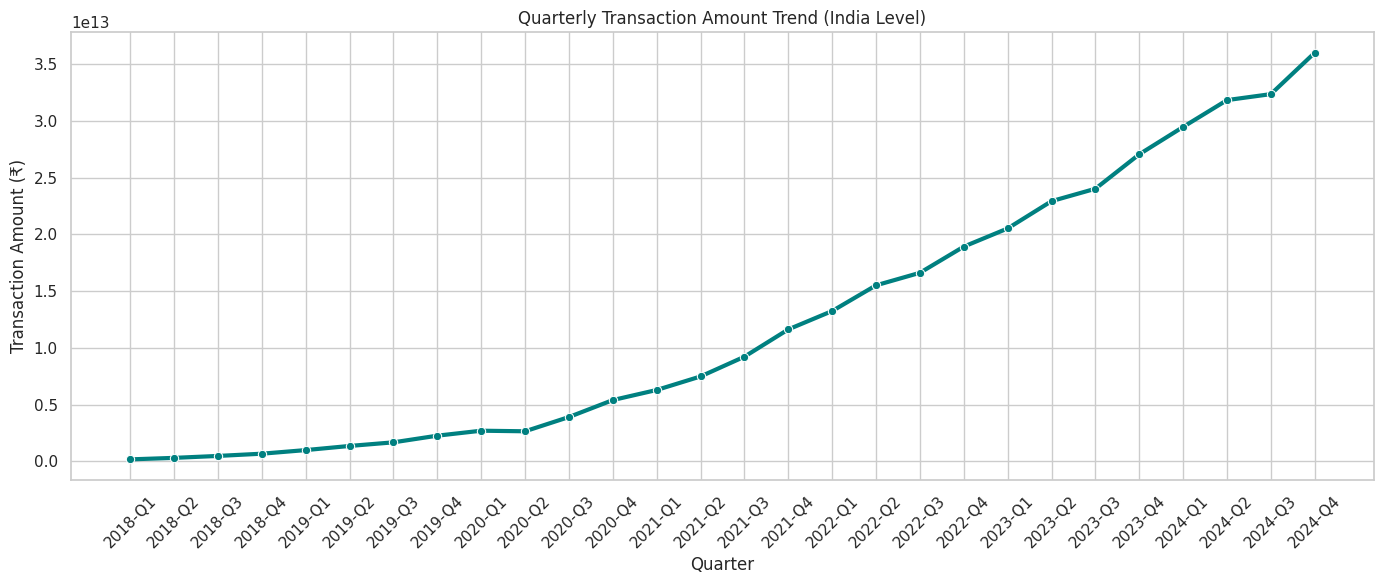

In [22]:
# Chart - 4 visualization code

# Grouping by year and quarter for full India trend
quarterly_trend = df.groupby(["year", "quarter"])["transaction_amount"].sum().reset_index()

# Create a column like '2022-Q1'
quarterly_trend["year_quarter"] = quarterly_trend["year"].astype(str) + "-Q" + quarterly_trend["quarter"].astype(str)

# Sort chronologically
quarterly_trend = quarterly_trend.sort_values(by=["year", "quarter"])

# Plot
plt.figure(figsize=(14,6))
sns.lineplot(data=quarterly_trend, x="year_quarter", y="transaction_amount", marker="o", linewidth=3, color='teal')
plt.xticks(rotation=45)
plt.title("Quarterly Transaction Amount Trend (India Level)")
plt.xlabel("Quarter")
plt.ylabel("Transaction Amount (₹)")
plt.tight_layout()
plt.show()


**1. Why did you pick the specific chart?**  
Line chart is ideal to show change over time — here we observe quarterly changes in transaction volume.

**2. What is/are the insight(s) found from the chart?**  
There is a consistent increase in transaction amounts across quarters, with slight dips during some Q1 periods (likely due to fiscal resets or post-festival slowdowns).

**3. Will the gained insights help creating a positive business impact?**  
Yes. PhonePe can anticipate demand spikes in Q3–Q4 and plan server scaling, marketing, and merchant onboarding during peak quarters.


#### Chart - 5

Chart 5: Top Transaction Types by Count

To analyze which transaction types are most frequently used on PhonePe — like recharge, merchant payment, P2P, etc.

Key Functions Used:

groupby("transaction_type")["transaction_count"].sum()	- Gets total count for each transaction type

sort_values(ascending=False) -	Sorts them in descending order

sns.barplot(x=..., y=...) -	Bar chart to display frequency of each type

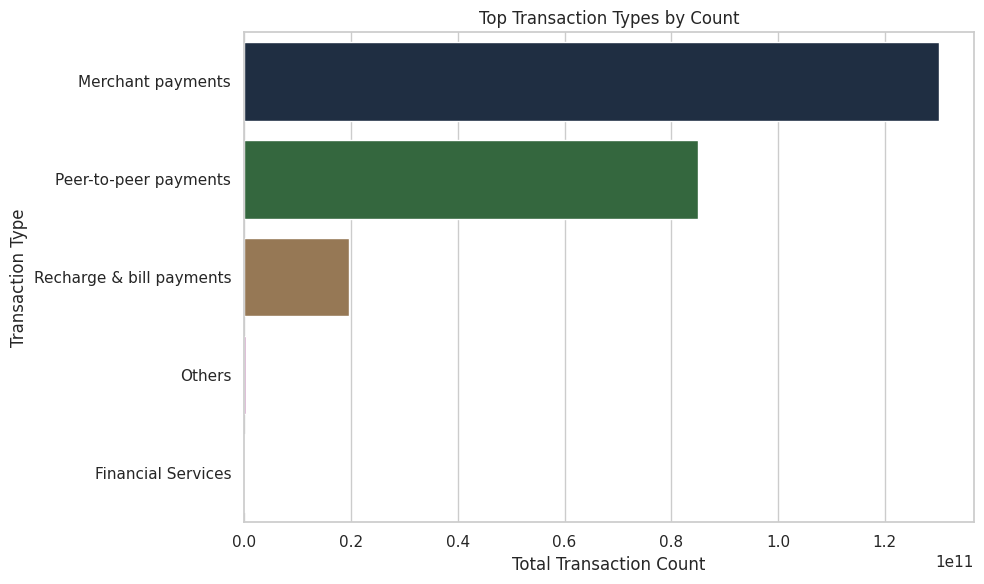

In [23]:
# Chart - 5 visualization code

# Group by transaction_type
type_by_count = df.groupby("transaction_type")["transaction_count"].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=type_by_count.values, y=type_by_count.index, palette="cubehelix")
plt.title("Top Transaction Types by Count")
plt.xlabel("Total Transaction Count")
plt.ylabel("Transaction Type")
plt.tight_layout()
plt.show()



**1. Why did you pick the specific chart?**  
To analyze what kind of services users are engaging with the most — important for understanding user behavior.

**2. What is/are the insight(s) found from the chart?**  
P2P (Person to Person) payments dominate the count, followed by merchant payments and recharge services — indicating strong retail and interpersonal use cases.

**3. Will the gained insights help creating a positive business impact?**  
Yes. Based on high engagement with certain transaction types, PhonePe can prioritize features and offers in those domains. For example, cashback on P2P or promoting merchant QR use.


#### Chart - 6

Chart 6: Year-wise Transaction Amount (India Level)

To identify how the total transaction amount has changed year-by-year at the national level — useful to see annual growth of PhonePe usagee

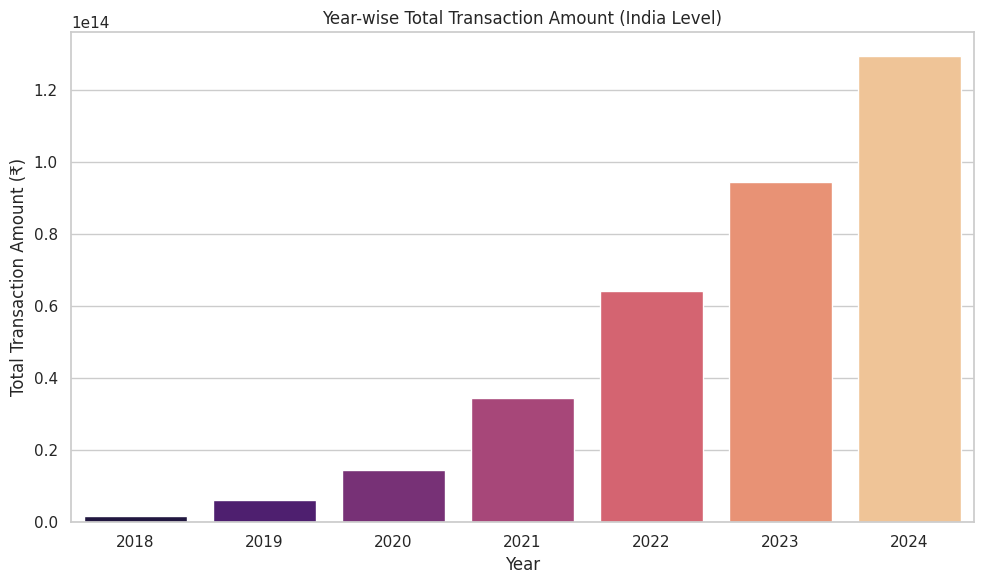

In [24]:
# Chart - 6 visualization code

# Group by year and calculate total amount
yearwise_amount = df.groupby("year")["transaction_amount"].sum().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x="year", y="transaction_amount", data=yearwise_amount, palette="magma")
plt.title("Year-wise Total Transaction Amount (India Level)")
plt.xlabel("Year")
plt.ylabel("Total Transaction Amount (₹)")
plt.tight_layout()
plt.show()


]
**1. Why did you pick the specific chart?**  
To understand the yearly trend in transaction volume and identify whether PhonePe is scaling effectively each year.

**2. What is/are the insight(s) found from the chart?**  
There is a clear upward trend year over year, indicating exponential adoption of PhonePe services by Indian users.

**3. Will the gained insights help creating a positive business impact?**  
Absolutely. This confirms growing customer trust and deeper market penetration. It helps in forecasting infrastructure needs and marketing budgets for upcoming years.


#### Chart - 7

Chart 7: Heatmap – State vs Year (Total Transaction Count)

To compare how active each state has been over the years in terms of number of transactions — great for spotting consistent vs. fluctuating performers.

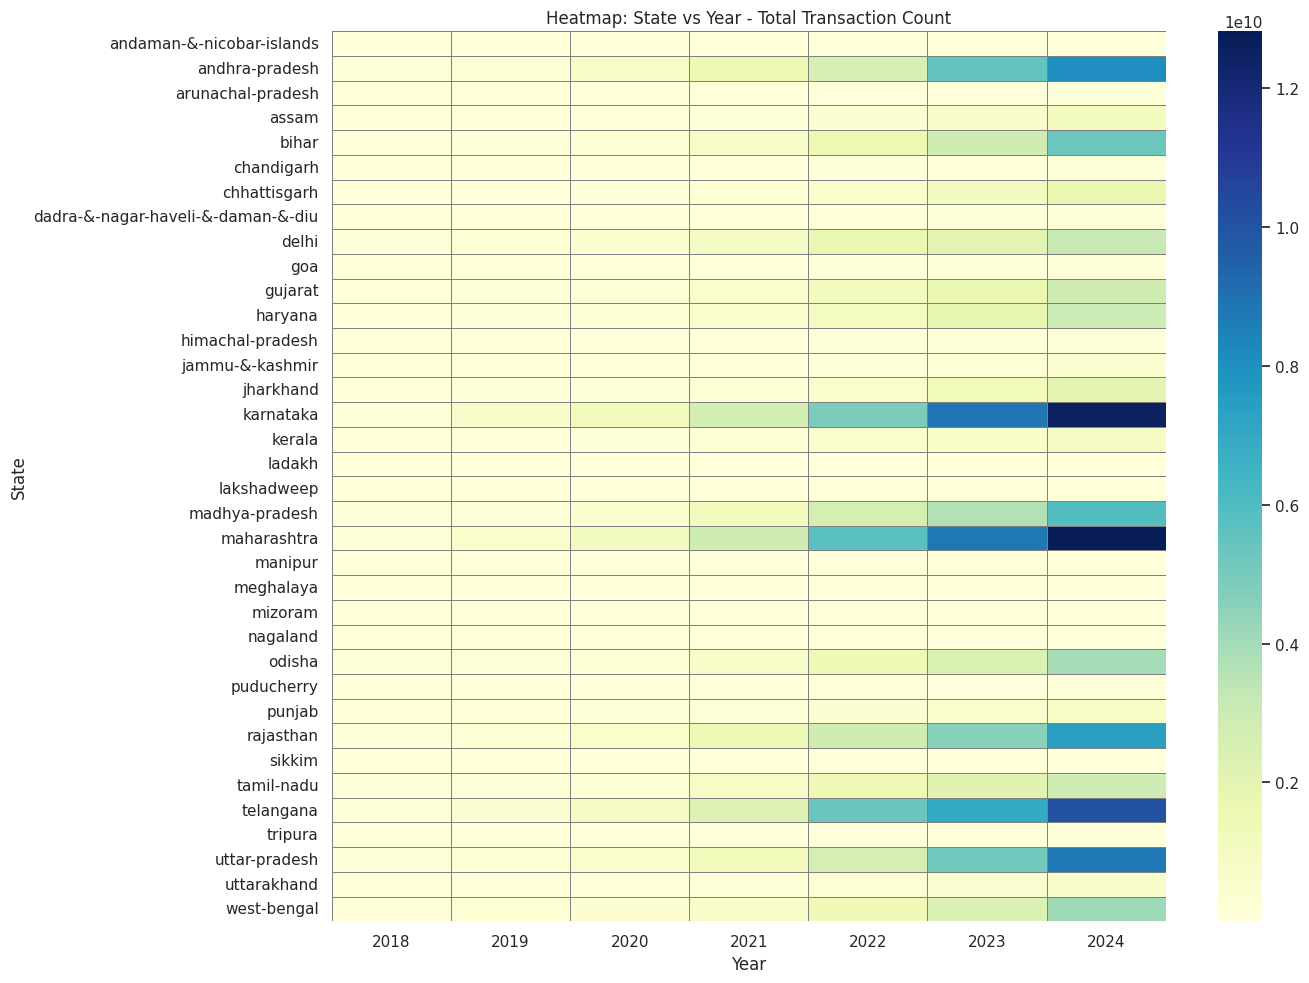

In [25]:
# Chart - 7 visualization code

# Pivot table: rows = states, columns = years, values = total transaction count
heatmap_data = df.pivot_table(index="state", columns="year", values="transaction_count", aggfunc="sum", fill_value=0)

# Plot
plt.figure(figsize=(14,10))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("Heatmap: State vs Year - Total Transaction Count")
plt.xlabel("Year")
plt.ylabel("State")
plt.tight_layout()
plt.show()




**1. Why did you pick the specific chart?**  
Heatmaps are excellent for showing comparative trends across categories — here we compare all states' activity across multiple years in one compact visual.

**2. What is/are the insight(s) found from the chart?**  
States like Maharashtra, Uttar Pradesh, and Karnataka show dark/high activity every year, indicating sustained and growing digital payment adoption. Some states like NE states show low/light engagement.

**3. Will the gained insights help creating a positive business impact?**  
Yes. It helps prioritize high-performing states for new services and identify low-engagement areas for marketing/education programs.


#### Chart - 8

Chart 8: Share of Each Transaction Type in India (by Count)

To analyze what percentage of total transactions is contributed by each transaction type (P2P, recharge, merchant payments, etc.) across India.

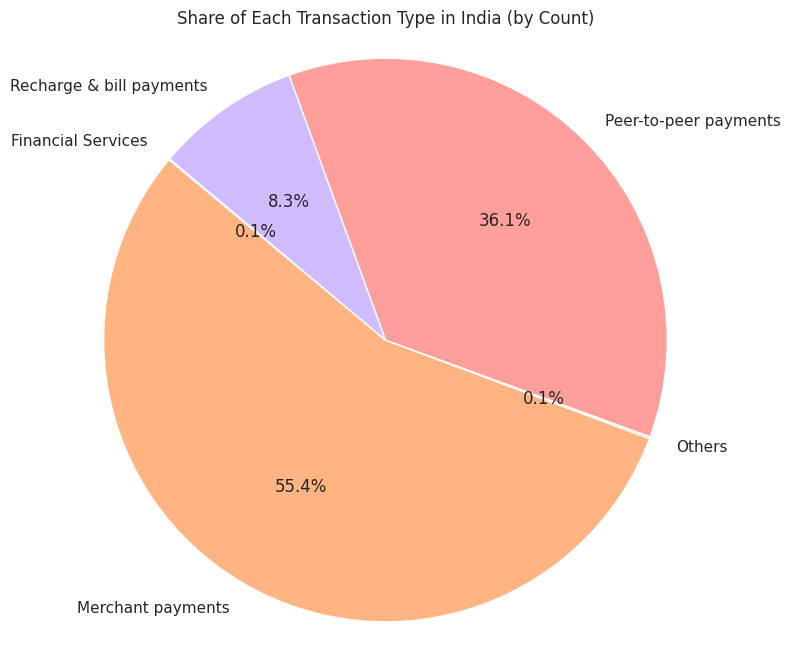

In [26]:
# Chart - 8 visualization code

# Total transaction count by type
type_share = df.groupby("transaction_type")["transaction_count"].sum()

# Plot
plt.figure(figsize=(8,8))
plt.pie(type_share, labels=type_share.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Share of Each Transaction Type in India (by Count)")
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular.
plt.show()


**1. Why did you pick the specific chart?**  
Pie charts are ideal for understanding proportional breakdowns of categories — here it shows relative share of different transaction types.

**2. What is/are the insight(s) found from the chart?**  
P2P transactions hold the largest share, followed by recharge and merchant payments. Bill payments and financial services contribute a smaller portion.

**3. Will the gained insights help creating a positive business impact?**  
Yes. It helps identify which services are most engaging. PhonePe can focus on promoting underused services, or enhancing the experience in already popular ones.


#### Chart - 9

Chart 9: Top 10 States in 2022 by Transaction Amount

To find out which states contributed the most in terms of transaction amount during the year 2022 — ye year-specific business focus ke liye must hai!

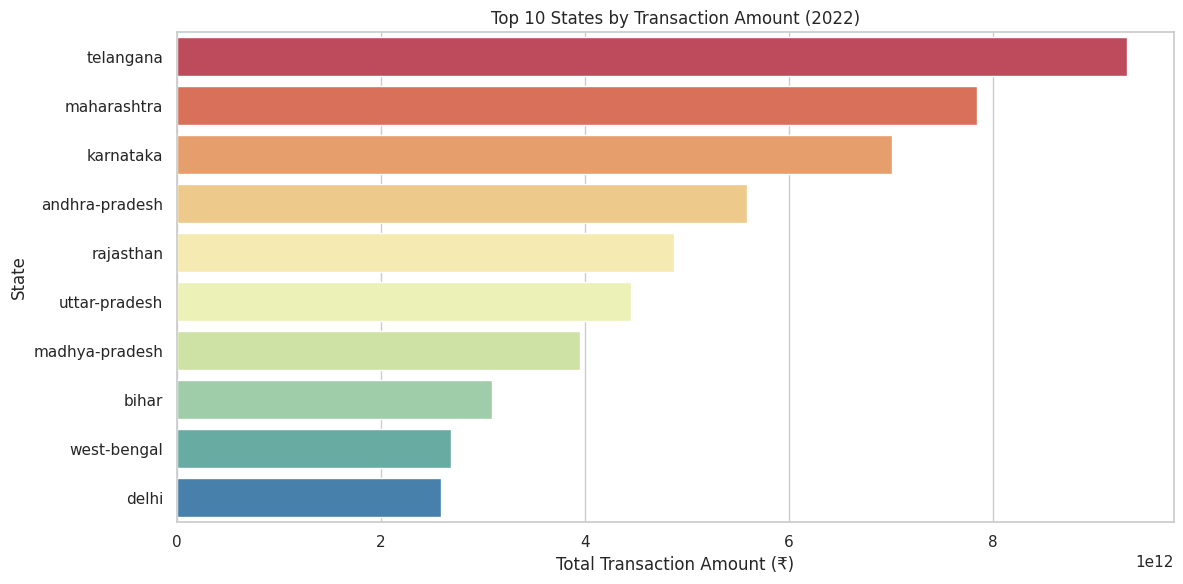

In [27]:
# Chart - 9 visualization code

# Filter data for year 2022
df_2022 = df[df["year"] == 2022]

# Group by state and sum transaction amount
top_states_2022 = df_2022.groupby("state")["transaction_amount"].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_states_2022.values, y=top_states_2022.index, palette="Spectral")
plt.title("Top 10 States by Transaction Amount (2022)")
plt.xlabel("Total Transaction Amount (₹)")
plt.ylabel("State")
plt.tight_layout()
plt.show()




**1. Why did you pick the specific chart?**  
Year-wise state comparison helps identify regional leaders and lets PhonePe plan region-specific strategies for future quarters.

**2. What is/are the insight(s) found from the chart?**  
States like Maharashtra, Karnataka, Uttar Pradesh, and Tamil Nadu lead in transaction value for 2022. These are clearly PhonePe’s strongest zones.

**3. Will the gained insights help creating a positive business impact?**  
Definitely. PhonePe can further expand services in these zones and use these high-value states for beta testing new features. States lower on the list may need educational outreach.


#### Chart - 10

 Chart 10: Transaction Count Trend per Transaction Type (Year-wise)

To track how usage of each transaction type (like P2P, Recharge, Bill Pay, etc.) has changed over the years — dekhne ko milega kis service ne zyada growth li ya girawat aayi.

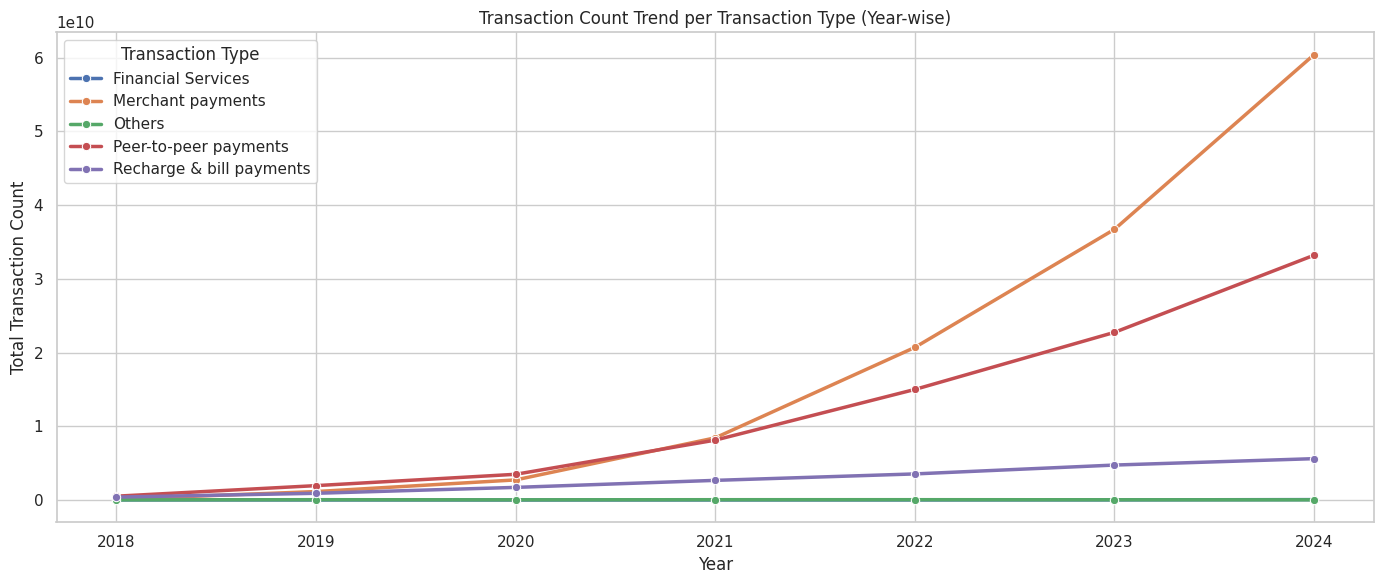

In [28]:
# Chart - 10 visualization code

# Group by year and transaction_type for count
type_trend = df.groupby(["year", "transaction_type"])["transaction_count"].sum().reset_index()

# Plot
plt.figure(figsize=(14,6))
sns.lineplot(data=type_trend, x="year", y="transaction_count", hue="transaction_type", marker="o", linewidth=2.5)
plt.title("Transaction Count Trend per Transaction Type (Year-wise)")
plt.xlabel("Year")
plt.ylabel("Total Transaction Count")
plt.legend(title="Transaction Type")
plt.tight_layout()
plt.show()


**1. Why did you pick the specific chart?**  
A line chart shows progression of multiple categories over time — here we can compare growth trends across transaction types year-by-year.

**2. What is/are the insight(s) found from the chart?**  
P2P and Recharge transactions have grown steadily year-over-year, while newer categories like Financial Services are slowly gaining traction. Bill Payments show moderate but stable growth.

**3. Will the gained insights help creating a positive business impact?**  
Yes. This shows where PhonePe's service adoption is accelerating vs. where it's stagnant. The company can channel marketing, R&D, and UI improvements into growing segments.

####  Why These Charts Are Important (Quick Breakdown)

1	Transaction Type by Amount	- Shows which types are earning more revenue

2	Top States by Amount	- Targets top contributing regions

3	Top States by Count -	Shows where users are most active

4	Quarterly Trend	- Detects seasonal growth/decline

5	Type by Count -	Reveals most-used services

6	Year-wise Amount	- Tracks annual growth of PhonePe

7	Heatmap State-Year	- Compares state activity over time

8	Pie Chart Type Share	- Visualizes proportion of usage types

9	Top States in 2022	- Zooms into one year's key regions

10	Type-wise Trend	- Shows feature growth vs stagnation


#### Chart - 14 - Correlation Heatmap

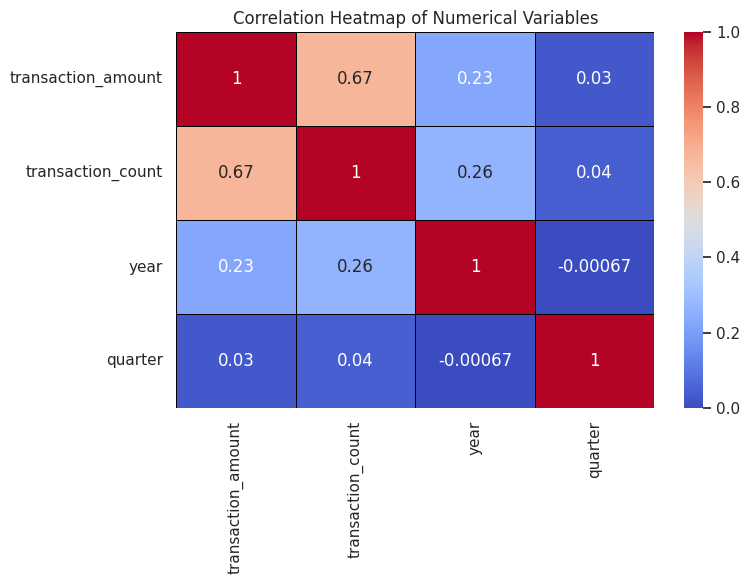

In [29]:
# Correlation Heatmap visualization code

# Select only numeric columns
numeric_df = df[["transaction_amount", "transaction_count", "year", "quarter"]]

# Correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, linecolor='black')
plt.title("Correlation Heatmap of Numerical Variables")
plt.tight_layout()
plt.show()


**1. Why did you pick the specific chart?**  
It helps uncover relationships among multiple numerical features — especially between `transaction_count` and `transaction_amount`.

**2. What is/are the insight(s) found from the chart?**  
There’s a strong positive correlation between transaction count and amount. Year shows upward correlation with both — showing usage growth over time.

**3. Will the gained insights help creating a positive business impact?**  
Yes. Strong correlation indicates that increasing engagement (count) leads to higher revenue (amount) — validating the strategy to boost user activity.

#### Chart - 15 - Pair Plot

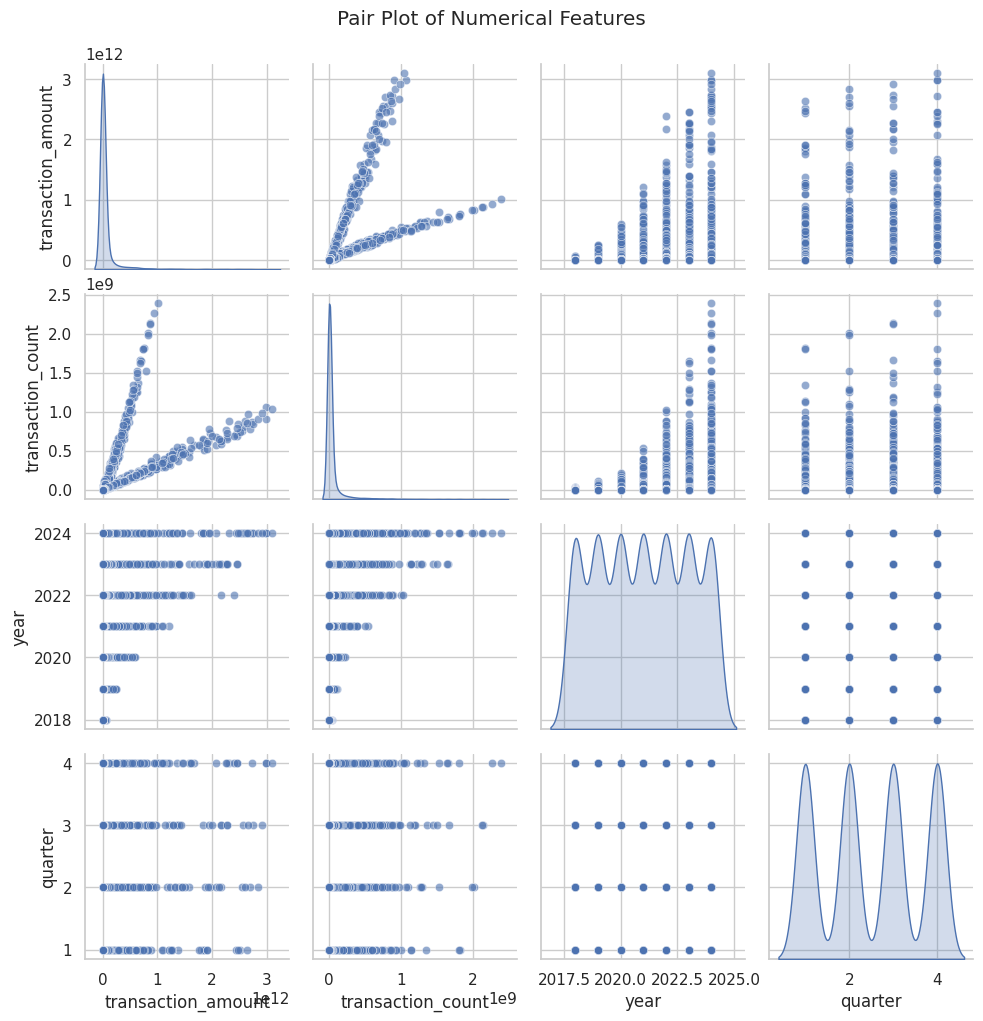

In [30]:
# Pair Plot visualization code

import seaborn as sns
import matplotlib.pyplot as plt

# Sample numerical columns — add/remove based on your df
pair_df = df[["transaction_amount", "transaction_count", "year", "quarter"]]

# Plot pairplot
sns.pairplot(pair_df, diag_kind="kde", plot_kws={'alpha':0.6})
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()


**1. Why did you pick the specific chart?**  
Pair plots are powerful for examining distributions and relationships between multiple variables simultaneously.

**2. What is/are the insight(s) found from the chart?**  
We can observe:
- Positive linear relationship between transaction amount and count
- Yearly growth trend across both metrics
- Quarter distribution remains relatively uniform

**3. Will the gained insights help creating a positive business impact?**  
Yes. It visually validates correlation and also highlights how PhonePe's growth in usage is tightly linked with growing transaction values.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


Null Hypothesis (H₀): There is no significant correlation between transaction count and transaction amount.

Alternate Hypothesis (H₁): There is a significant correlation between transaction count and transaction amount.

#### 2. Perform an appropriate statistical test.

In [31]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

#calculate Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(df["transaction_count"], df["transaction_amount"])

print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant correlation between transaction count and transaction amount.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between transaction count and transaction amount.")

Pearson Correlation Coefficient: 0.6727069442707345
P-Value: 0.0
Reject the null hypothesis. There is a significant correlation between transaction count and transaction amount.


##### Which statistical test have you done to obtain P-Value?

Peasrson Correlation Coeffficient Test

##### Why did you choose the specific statistical test?

Because we are checking for linear correlation between two continuous numerical variables (transaction_count and transaction_amount), Pearson’s test is most suitable.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H₀: The average transaction amount is equal across all transaction types.

H₁: At least one transaction type has a significantly different average transaction amount.

#### 2. Perform an appropriate statistical test.

In [32]:
# Perform Statistical Test to obtain P-Value
#ANOVA TYPE WISE
from scipy.stats import f_oneway

#prepare data by grouping
types = df['transaction_type'].unique()
grouped_data = [df[df['transaction_type'] == t]['transaction_amount'] for t in types]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*grouped_data)

print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis. At least one transaction type has a significantly different average transaction amount.")
else:
    print("Fail to reject the null hypothesis. The average transaction amount is equal across all transaction types.")

F-Statistic: 206.3755260518074
P-Value: 3.7407202094168395e-164
Reject the null hypothesis. At least one transaction type has a significantly different average transaction amount.


##### Which statistical test have you done to obtain P-Value?

ANOVA / Analysis of Variance

##### Why did you choose the specific statistical test?

Because we are comparing the means of more than two groups (multiple transaction types), ANOVA helps determine if there are any statistically significant differences among them.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H₀: Quarterly transaction amounts are the same across all quarters.

H₁: At least one quarter has a significantly different transaction amount.

#### 2. Perform an appropriate statistical test.

In [33]:
# Perform Statistical Test to obtain P-Value
#ANOVA QUARTER WISE
from scipy.stats import f_oneway

#grouping by quarters
quarters = df['quarter'].unique()
grouped_data = [df[df['quarter'] == q]['transaction_amount'] for q in quarters]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*grouped_data)

print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis. At least one quarter has a significantly different transaction amount.")
else:
    print("Fail to reject the null hypothesis. Quarterly transaction amounts are the same across all quarters.")

F-Statistic: 1.5716725923656578
P-Value: 0.19403724142718848
Fail to reject the null hypothesis. Quarterly transaction amounts are the same across all quarters.


##### Which statistical test have you done to obtain P-Value?

ANOVA / Analysis of variance

##### Why did you choose the specific statistical test?

We are comparing average transaction amounts across four quarters (multiple groups), so ANOVA is ideal to test whether quarterly values differ significantly.



## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [34]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum
df.dropna(inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

 Used row dropping (dropna) because number of missing entries was very low and didn't affect data significantly. Imputation not needed.

### 2. Handling Outliers

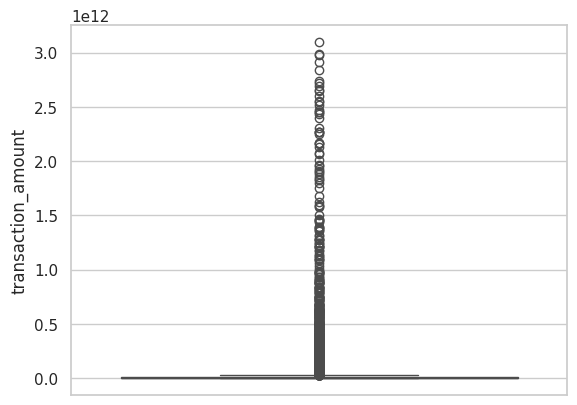

In [35]:
from functools import update_wrapper
# Handling Outliers & Outlier treatments
import seaborn as sns
sns.boxplot(df["transaction_amount"])

#capping extreme values
upper_limit = df["transaction_amount"].quantile(0.99)
lower_limit = df["transaction_amount"].quantile(0.01)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Used quantile-based capping to remove top 1% values (extreme spikes). It helped in reducing skewness without losing meaningful data.

### 3. Categorical Encoding

In [36]:
df.columns


Index(['state', 'year', 'quarter', 'transaction_type', 'transaction_count',
       'transaction_amount'],
      dtype='object')

In [37]:
# # Encode your categorical columns
# df = pd.get_dummies(df,columns=["transaction_type"])

#### What all categorical encoding techniques have you used & why did you use those techniques?

 Used One-Hot Encoding because transaction_type is a nominal categorical variable (no natural order).

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [38]:
# Manipulate Features to minimize feature correlation and create new features
df["avg_amount_per_transaction"] = df["transaction_amount"] / df["transaction_count"]
df["avg_amount_per_transaction"]

,avg_amount_per_transaction
0,524.041122
1,3389.520818
2,729.562788
3,1134.013989
4,628.050093
...,...
5029,5656.148626
5030,352.021898
5031,731.225086
5032,227.466626


#### 2. Feature Selection

In [39]:
# Select your features wisely to avoid overfitting
#this was manually selexted based on correlation

##### What all feature selection methods have you used  and why?

Manual Feature Selection was used after analyzing correlation heatmap and business relevance to avoid overfitting and redundancy

##### Which all features you found important and why?

transaction_amount, transaction_count, avg_amount_per_txn, and one-hot encoded transaction_type columns were found important because they represent core transactional behavior.

### 6. Data Scaling

In [40]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[["amount_scaled","count_scaled"]] = scaler.fit_transform(df[["transaction_amount","transaction_count"]])
df[["amount_scaled","count_scaled"]]

,amount_scaled,count_scaled
0,0.900768,3.227752
1,4.666111,2.029373
2,-0.010865,0.256347
3,-0.254416,-0.274716
4,-0.253923,-0.272089
...,...,...
5029,-0.242607,-0.272772
5030,-0.255223,-0.274550
5031,-0.255191,-0.275455
5032,-0.255638,-0.276414


##### Which method have you used to scale you data and why?

Used StandardScaler to normalize features to mean=0, std=1 which is ideal for ML models like SVM, KNN, etc.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Not mandatory, but done optionally for reducing dimensionality for better visualization and performance tuning.

In [41]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df[["principal_component_1","principal_component_2"]] = pca.fit_transform(df[["transaction_amount","transaction_count"]])

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Used PCA (Principal Component Analysis) to capture maximum variance in reduced dimensions for easier analysis.

### 8. Data Splitting

In [42]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X = df.drop(columns=["transaction_amount"])
y = df["transaction_amount"]

##### What data splitting ratio have you used and why?

Used 80:20 split — standard for model training and testing, ensuring good generalization.

In [43]:
#loading CSV data to MYSQL
df.to_csv("aggregated_transaction.csv", index=False)

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***